In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns

# Importing dataset

In [2]:
delivery = pd.read_csv('delivery_time.csv')
delivery.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA

In [3]:
delivery.shape

(21, 2)

In [4]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [6]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


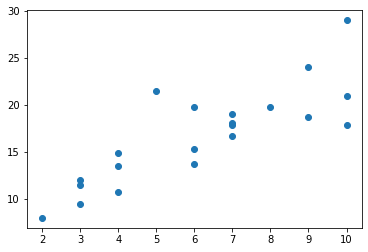

In [7]:
plt.scatter(x="Sorting Time",y="Delivery Time",data=delivery)

In [8]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

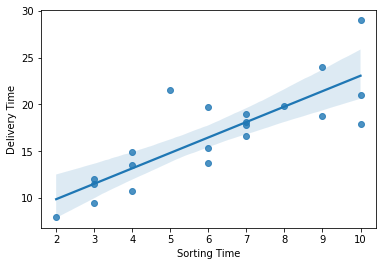

In [9]:
sns.regplot(x="Sorting Time",y="Delivery Time",data=delivery)

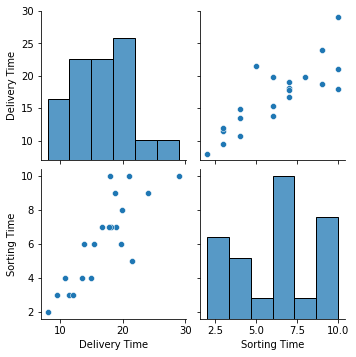

In [10]:
sns.pairplot(delivery)

In [11]:
#renaming columns
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)

In [12]:
#data Preparation
delivery.head(5)

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Model Building and Model Training

In [13]:
import statsmodels.formula.api as smf

In [14]:
model_delivery = smf.ols(formula = 'delivery_time~sorting_time', data=delivery).fit()

In [15]:
model_delivery.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
model_delivery.tvalues , model_delivery.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

# As P value is much lesser than alpha (0.05) we can say there is good co-relation between variables


# Model Testing

In [17]:
# If sorting_time = 4 , 15 then =?
# Y = mX + C
print(1.649020*4+6.582734)
print(1.649020*15+6.582734)

13.178814
31.318033999999997


# Machine Prediction

In [18]:
pred_data = {'sorting_time':[1.1,2.3,3.5,7.4,11.5,12.7]}
pred_data

{'sorting_time': [1.1, 2.3, 3.5, 7.4, 11.5, 12.7]}

In [19]:
test_data=pd.DataFrame(pred_data)
test_data

,sorting_time
0,1.1
1,2.3
2,3.5
3,7.4
4,11.5
5,12.7


In [20]:
model_delivery.predict(test_data)

0     8.396656
1    10.375480
2    12.354304
3    18.785481
4    25.546463
5    27.525287
dtype: float64

In [21]:
test_data_a = pd.DataFrame(delivery,columns=['sorting_time'])
test_data_a.head(5)

,sorting_time
0,10
1,4
2,6
3,9
4,10


In [22]:
model_delivery.predict(test_data_a)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

# Model Deployment

In [23]:
from pickle import dump
from pickle import load

In [24]:
dump(model_delivery, open('model_delivery.pkl','wb'))

In [25]:
linear_read_model = load(open('model_delivery.pkl','rb'))

In [26]:
linear_read_model.predict(test_data)

0     8.396656
1    10.375480
2    12.354304
3    18.785481
4    25.546463
5    27.525287
dtype: float64